<a href="https://colab.research.google.com/github/Ajwad07/ML_projects_2025/blob/main/AE_mnist_linear_layes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.geeksforgeeks.org/implementing-an-autoencoder-in-pytorch/


In [1]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(root="./data", train=True, download=True, transform=tensor_transform)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 605kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.62MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.78MB/s]


Encoder: Compresses the 784-pixel image into a smaller latent representation through fully connected layers with ReLU activations helps in reducing dimensions.

28*28 = 784 ==> 128 ==> 64 ==> 36 ==> 18 ==> 9

Decoder: Reconstructs the original image by expanding the latent vector back to the original size, ending with a Sigmoid activation to output pixel values between 0 and 1.

9 ==> 18 ==> 36 ==> 64 ==> 128 ==> 784 ==> 28*28 = 784

In [3]:
class AE(torch.nn.Module):
  def __init__(self):
    super(AE, self).__init__()
    self.encoder=nn.Sequential(
        nn.Linear(28*28*1, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64,36),
        nn.ReLU(),
        nn.Linear(36,18),
        nn.ReLU(),
        nn.Linear(18,9)
    )

    self.decoder=nn.Sequential(
        nn.Linear(9,18),
        nn.ReLU(),
        nn.Linear(18,36),
        nn.ReLU(),
        nn.Linear(36,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,28*28*1),
        nn.Sigmoid()
    )
  def forward(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded

In [4]:
model=AE()
loss_fn=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001,weight_decay=1e-9)

Epoch:1, Loss:0.04493521526455879
Epoch:2, Loss:0.03410593420267105
Epoch:3, Loss:0.031043313443660736
Epoch:4, Loss:0.032850395888090134
Epoch:5, Loss:0.037341635674238205
Epoch:6, Loss:0.031665902584791183
Epoch:7, Loss:0.027690371498465538
Epoch:8, Loss:0.025071872398257256
Epoch:9, Loss:0.026869358494877815
Epoch:10, Loss:0.024188216775655746
Epoch:11, Loss:0.022979671135544777
Epoch:12, Loss:0.019350320100784302
Epoch:13, Loss:0.021553605794906616
Epoch:14, Loss:0.022219261154532433
Epoch:15, Loss:0.01786220632493496
Epoch:16, Loss:0.022760018706321716
Epoch:17, Loss:0.021318834275007248
Epoch:18, Loss:0.01933743804693222
Epoch:19, Loss:0.018848704174160957
Epoch:20, Loss:0.02058829739689827


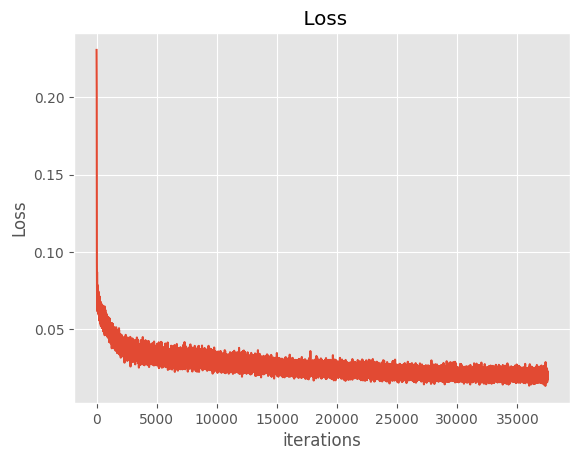

In [5]:
epochs=20
op=[]
losses=[]

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

for epoch in range(epochs):
  for images,_ in loader:
    images=images.view(-1,28*28*1).to(device)


    reconstructed =model(images)
    loss=loss_fn(reconstructed,images)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
  op.append((epoch,images,reconstructed))
  print(f"Epoch:{epoch+1}, Loss:{loss.item()}")

plt.style.use("ggplot")
plt.figure()
plt.plot(losses)
plt.title(" Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()


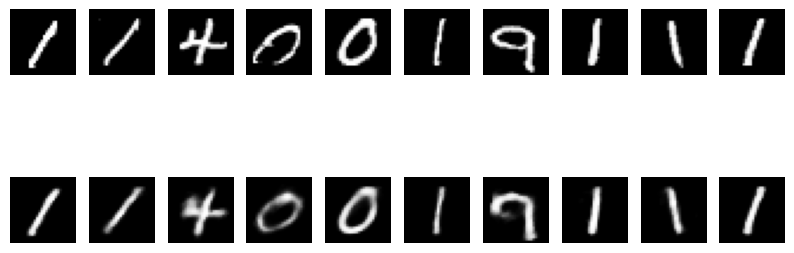

In [7]:
model.eval()
dataiter=iter(loader)
images,_=next(dataiter)
images=images.view(-1,28*28*1).to(device)
reconstructed=model(images)

fig,axes=plt.subplots(nrows=2,ncols=10,sharex=True,sharey=True,figsize=(10,4))
for i in range(10):
  axes[0][i].imshow(images.cpu().detach().numpy()[i].reshape(28,28),cmap="gray")
  axes[0,i].axis('off')
  axes[1][i].imshow(reconstructed.cpu().detach().numpy()[i].reshape(28,28),cmap="gray")
  axes[1,i].axis('off')
plt.show()